# DS-SF-27 | Final Project 3: Exploratory Data Analysis

Loading the python libraries we will need for this project:

In [58]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np


pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

from sklearn import decomposition, cluster,preprocessing

%matplotlib inline
plt.style.use('ggplot')

Then, read in our dataset:

In [59]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', 'free_live_tv_august_2016_CLEAN.csv'))

df.head()

,discovery,general,live_news,musique,political_news,sport,tv_shows,youth
0,2,4,0,0,0,0,0,0
1,7,46,10,1,1,0,0,4
2,27,189,3,5,0,6,0,23
3,2,6,0,0,0,0,0,0
4,10,21,1,2,0,0,0,0


## Reminder: the goal is to do households segmentation based on their consumption of different type of free live TV channels.

## How many observations are in our dataset?

In [60]:
df.shape

(410471, 8)

## Let's create a summary table.

In [61]:
df.describe()

,discovery,general,live_news,musique,political_news,sport,tv_shows,youth
count,410471.000000,410471.000000,410471.000000,410471.000000,410471.000000,410471.000000,410471.000000,410471.000000
mean,12.108354,90.267571,10.713439,2.653159,1.112071,3.485469,2.566734,7.169637
std,23.100904,111.905517,24.376363,6.141266,5.013737,10.837488,7.295313,15.653712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,55.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,14.000000,122.000000,10.000000,3.000000,1.000000,2.000000,2.000000,7.000000
max,767.000000,2585.000000,1044.000000,323.000000,2504.000000,569.000000,670.000000,595.000000


## Let's check the variance

In [62]:
pd.set_option('display.max_rows', 100)
df.var()

discovery           533.651777
general           12522.844799
live_news           594.207061
musique              37.715148
political_news       25.137556
sport               117.451139
tv_shows             53.221594
youth               245.038690
dtype: float64

We see very different variances based on how much a specific type of channels is watched. The general channels being watched the most and the political news channels being watched the least.

## Box plots

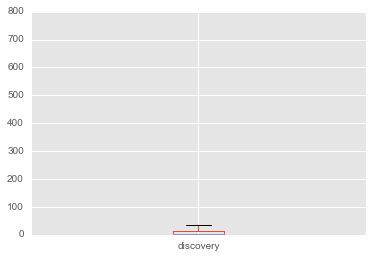

In [63]:
df["discovery"].plot(kind = 'box')

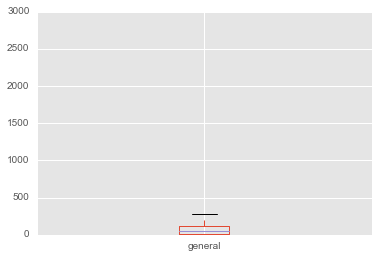

In [64]:
df["general"].plot(kind = 'box')

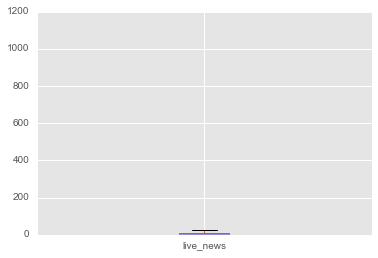

In [65]:
df["live_news"].plot(kind = 'box')

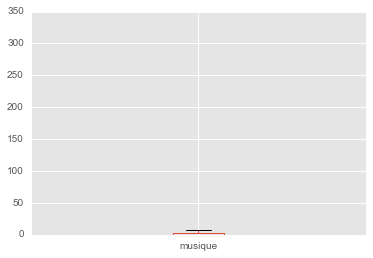

In [66]:
df["musique"].plot(kind = 'box')

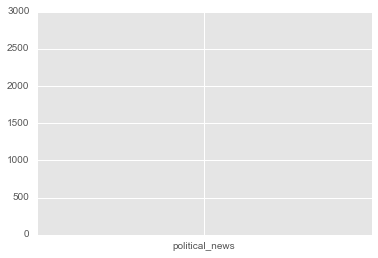

In [67]:
df["political_news"].plot(kind = 'box')

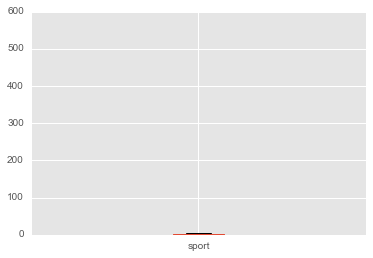

In [68]:
df["sport"].plot(kind = 'box')

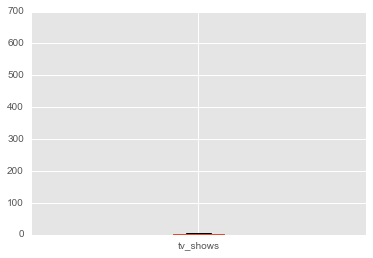

In [69]:
df["tv_shows"].plot(kind = 'box')

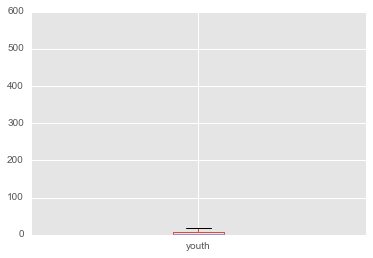

In [70]:
df["youth"].plot(kind = 'box')

The means and box plots of each columns show us that there are too many households without any activity or with very few activity. Let's try to drop them:

In [71]:
df[df.sum(axis=1)>1500].shape

(219, 8)

In [72]:
df=df[df.sum(axis=1)>1500]
df.shape

(219, 8)

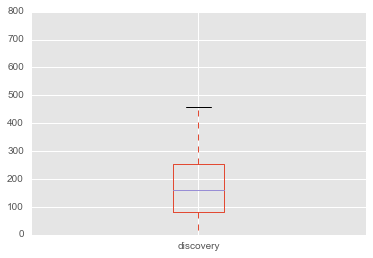

In [73]:
df["discovery"].plot(kind = 'box')

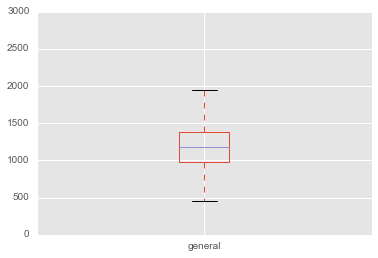

In [74]:
df["general"].plot(kind = 'box')

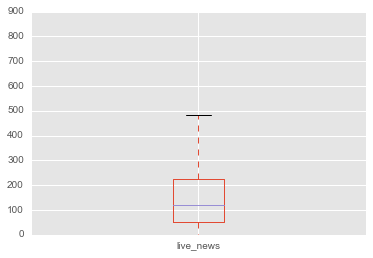

In [75]:
df["live_news"].plot(kind = 'box')

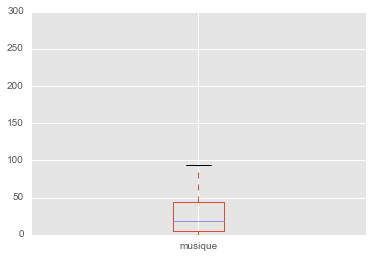

In [76]:
df["musique"].plot(kind = 'box')

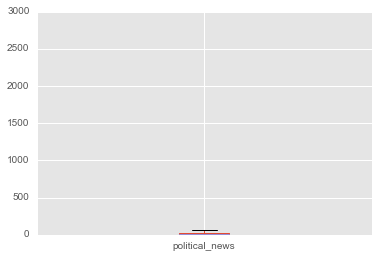

In [77]:
df["political_news"].plot(kind = 'box')

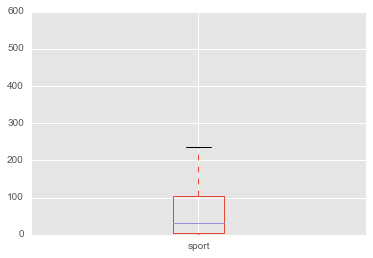

In [78]:
df["sport"].plot(kind = 'box')

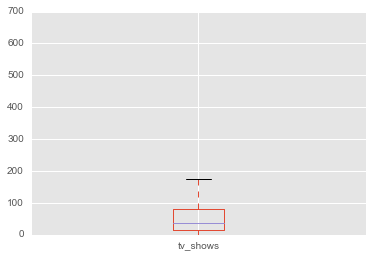

In [79]:
df["tv_shows"].plot(kind = 'box')

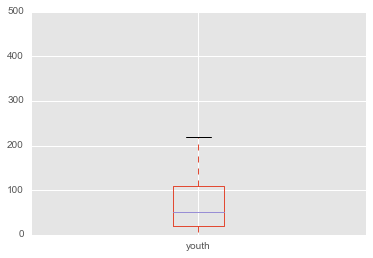

In [80]:
df["youth"].plot(kind = 'box')

The box plots look better, we got rid of most households which had activities at zero, except for the political news type...

## Let's plot the distribution of each variable.

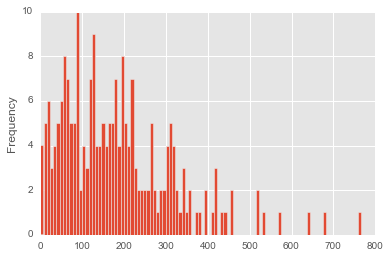

In [81]:
df["discovery"].plot(kind = 'hist',bins=100)

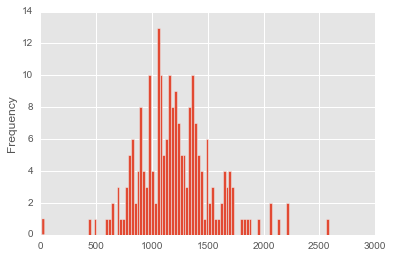

In [82]:
df["general"].plot(kind = 'hist',bins=100)

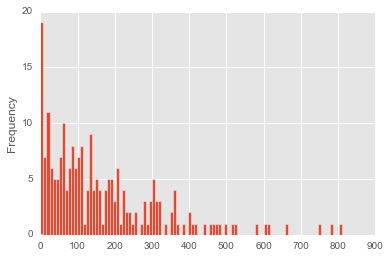

In [83]:
df["live_news"].plot(kind = 'hist',bins=100)

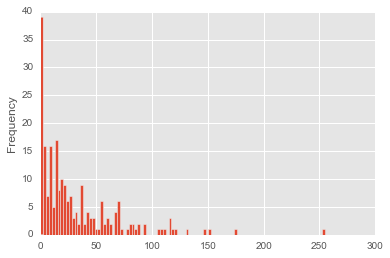

In [84]:
df["musique"].plot(kind = 'hist',bins=100)

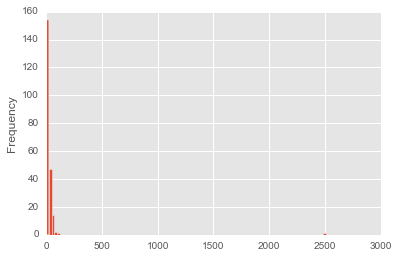

In [85]:
df["political_news"].plot(kind = 'hist',bins=100)

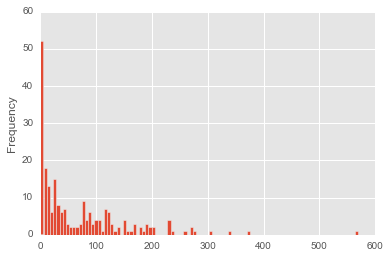

In [86]:
df["sport"].plot(kind = 'hist',bins=100)

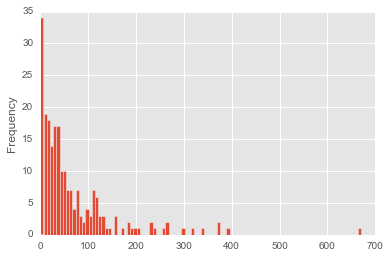

In [87]:
df["tv_shows"].plot(kind = 'hist',bins=100)

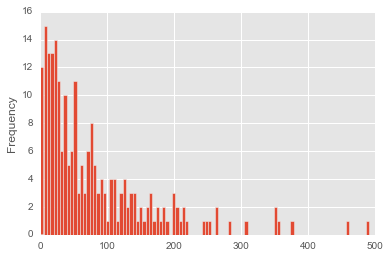

In [88]:
df["youth"].plot(kind = 'hist',bins=100)

We see that there are still a lot of households with small or no activity.

## Now let's check if our features follow a normal distribution:

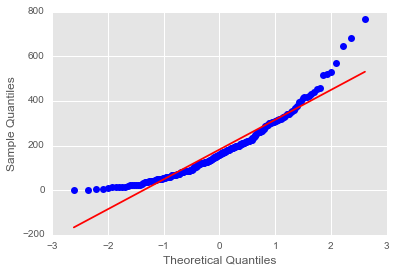

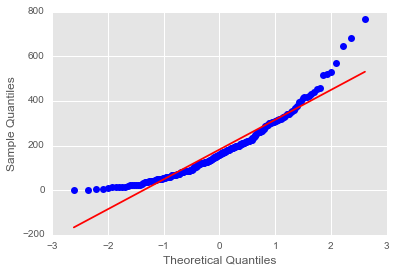

In [89]:
sm.qqplot(df["discovery"], line = 's')

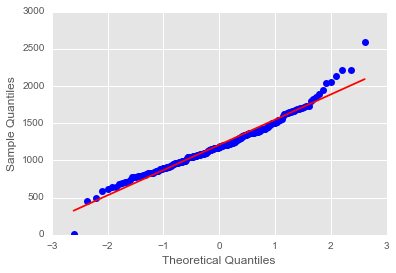

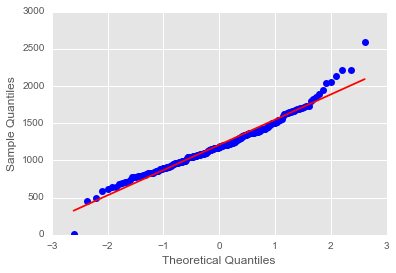

In [90]:
sm.qqplot(df["general"], line = 's')

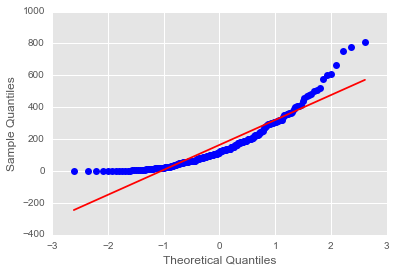

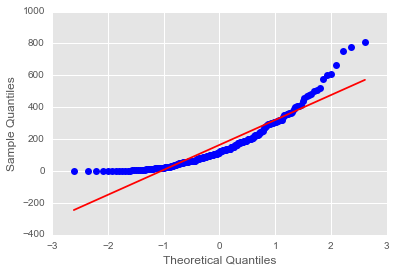

In [91]:
sm.qqplot(df["live_news"], line = 's')

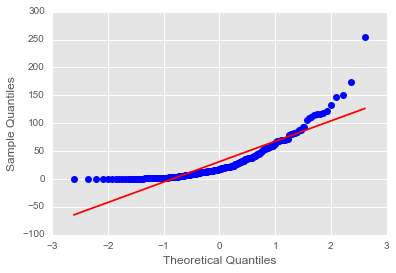

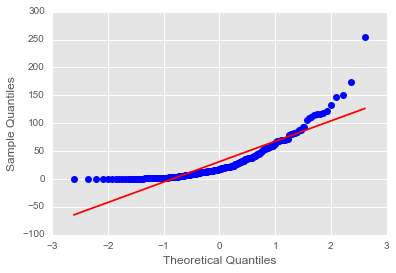

In [92]:
sm.qqplot(df["musique"], line = 's')

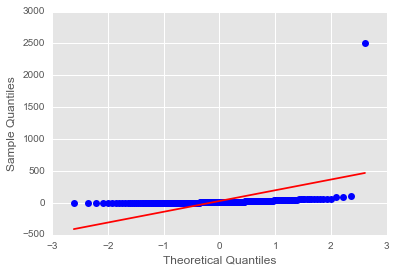

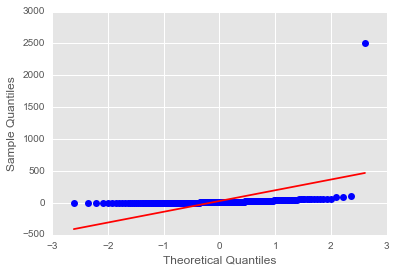

In [93]:
sm.qqplot(df["political_news"], line = 's')

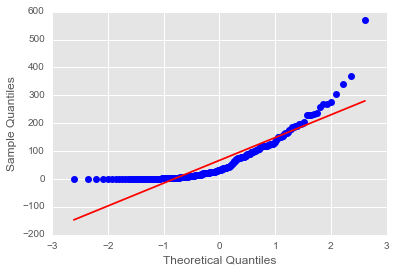

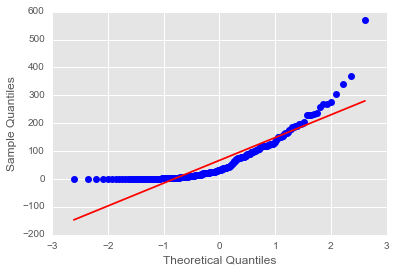

In [94]:
sm.qqplot(df["sport"], line = 's')

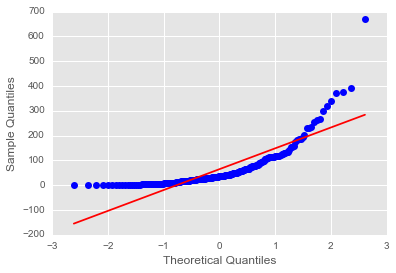

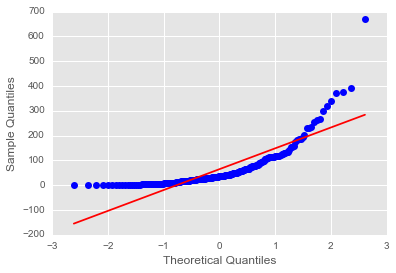

In [95]:
sm.qqplot(df["tv_shows"], line = 's')

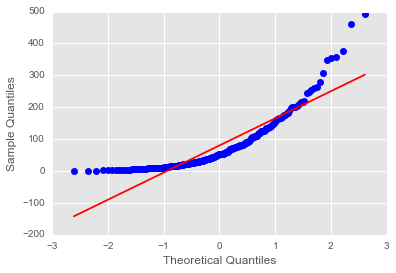

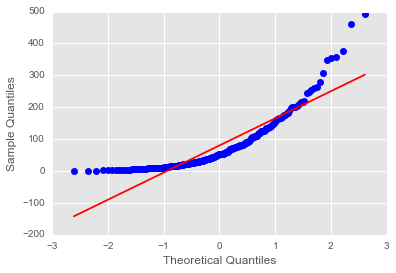

In [96]:
sm.qqplot(df["youth"], line = 's')

Those features do not follow a normal distribution, except the general type of channels. We'll have to keep that in mind when we decide which model to use!

## Let's create a correlation matrix for the dataset

In [97]:
df.corr()

,discovery,general,live_news,musique,political_news,sport,tv_shows,youth
discovery,1.000000,-0.200548,0.037443,0.256588,-0.050289,-0.062028,-0.032909,-0.042072
general,-0.200548,1.000000,-0.388239,-0.082115,-0.269826,-0.080617,0.303436,-0.018807
live_news,0.037443,-0.388239,1.000000,-0.026706,-0.040704,0.107755,-0.175587,-0.047722
musique,0.256588,-0.082115,-0.026706,1.000000,-0.024336,-0.002591,0.065748,0.065010
political_news,-0.050289,-0.269826,-0.040704,-0.024336,1.000000,-0.063630,-0.061983,-0.052883
sport,-0.062028,-0.080617,0.107755,-0.002591,-0.063630,1.000000,-0.152946,0.475084
tv_shows,-0.032909,0.303436,-0.175587,0.065748,-0.061983,-0.152946,1.000000,-0.159864
youth,-0.042072,-0.018807,-0.047722,0.065010,-0.052883,0.475084,-0.159864,1.000000


We can see that colinearity won't be an issue with this dataset.

## Let's see if we can already find patterns of usage in the data:

TypeError: 'numpy.ndarray' object is not callable

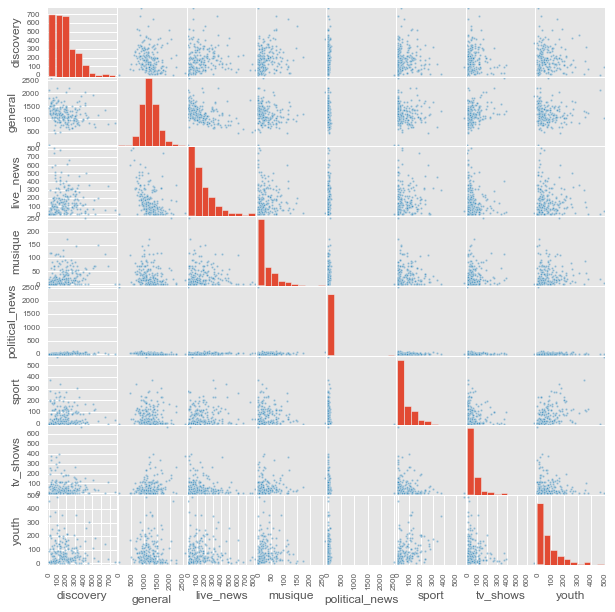

In [127]:
pd.tools.plotting.scatter_matrix(df, figsize=(10,10))()

We don't specifically see any clusters of households forming in any of those 2D plans.

## Let's rank each type of channels for each households:

In [98]:
df_ranked= pd.DataFrame({n: df.T[col].nlargest(8).index.tolist() 
                  for n, col in enumerate(df.T)}).T

In [99]:
df_ranked

,0,1,2,3,4,5,6,7
0,general,discovery,sport,youth,live_news,tv_shows,political_news,musique
1,general,discovery,live_news,sport,youth,political_news,musique,tv_shows
2,general,live_news,discovery,musique,sport,youth,tv_shows,political_news
3,general,tv_shows,discovery,live_news,political_news,youth,sport,musique
4,general,discovery,live_news,tv_shows,musique,youth,political_news,sport
5,general,live_news,discovery,political_news,musique,tv_shows,sport,youth
6,general,live_news,youth,tv_shows,discovery,sport,musique,political_news
7,general,discovery,live_news,political_news,youth,sport,tv_shows,musique
8,general,tv_shows,youth,discovery,musique,live_news,political_news,sport
9,general,discovery,tv_shows,youth,musique,sport,live_news,political_news


## Which type of channels is the most watched by households?

In [100]:
df_ranked[df_ranked.columns[0]].value_counts()

general           214
live_news           4
political_news      1
Name: 0, dtype: int64

In [121]:
100*float(df_ranked[df_ranked.columns[0]].value_counts()[0])/ \
sum(df_ranked[df_ranked.columns[0]].value_counts())

97.71689497716895

The group of channel of genre general is the most watched for ~98% of those households.

## Out of the people whose most watched channel type is "general", which type of channels is the second most wacthed?

In [108]:
df_ranked[df_ranked[df_ranked.columns[0]]=='general'][df_ranked.columns[1]].value_counts()

discovery    91
live_news    63
tv_shows     23
youth        21
sport        14
musique       2
Name: 1, dtype: int64

In [119]:
100*float(df_ranked[df_ranked[df_ranked.columns[0]]=='general'][df_ranked.columns[1]].value_counts()[0])/\
sum(df_ranked[df_ranked[df_ranked.columns[0]]=='general'][df_ranked.columns[1]].value_counts())

42.52336448598131

The group of channel of genre discovery is the most watched for ~43% of those households.

## Out of the people whose second most watched channel type is "discovery", which type of channels is the third most wacthed?

In [112]:
df_ranked[((df_ranked[df_ranked.columns[0]]=='general') & (df_ranked[df_ranked.columns[1]]=='discovery'))][df_ranked.columns[2]].value_counts()

live_news         40
tv_shows          18
youth             14
sport             11
musique            6
political_news     2
Name: 2, dtype: int64

In [122]:
100*float(df_ranked[((df_ranked[df_ranked.columns[0]]=='general') & (df_ranked[df_ranked.columns[1]]=='discovery'))][df_ranked.columns[2]].value_counts()[0])/\
sum(df_ranked[((df_ranked[df_ranked.columns[0]]=='general') & (df_ranked[df_ranked.columns[1]]=='discovery'))][df_ranked.columns[2]].value_counts())

43.956043956043956

The group of channel of genre live_news is the most watched for ~44% of those households.

In [124]:
100*.9771689497716895*.4252336448598131*.43956043956043956

18.2648401826484

### ~18% of households have the general channels as their 1st most watched channels, discovery channels as their 2nd most watched channels and live news channels as their 3rd most watched channels.